Tutorial 11: Data and Models
===========================

Up to now, we've used used the `Aggregator` to load and inspect the `Samples` of 3 model-fits.

In this tutorial, we'll look at how the way we designed our source code makes it easy to use the `Aggregator` to
inspect, interpret and plot the results of the model-fit, including refitting the best models to our data.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

from os import path
import autofit as af

/mnt/c/Users/Jammy/Code/PyAuto/autofit_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autofit_workspace`


To load these results with the `Aggregator`, we again point it to the path of the results we want it to inspect, with
our path straight to the `Aggregator` results ensuring we don't need to filter our `Aggregator` in this tutorial.

In [2]:
agg = af.Aggregator(directory=path.join("output", "howtofit", "chapter_1", "database"))

Aggregator loading phases... could take some time.

 A total of 3 phases and results were found.


We'll reuse the `plot_line` function of previous tutorials, however it now displays to the notebook as opposed to
outputting the results to a .png file.

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def plot_line(xvalues, line, title=None, ylabel=None, errors=None, color="k"):
    plt.errorbar(
        x=xvalues, y=line, yerr=errors, color=color, ecolor="k", elinewidth=1, capsize=2
    )
    plt.title(title)
    plt.xlabel("x value of profile")
    plt.ylabel(ylabel)
    plt.show()
    plt.clf()


We can use the `Aggregator` to load a generator of every fit`s data, by changing the `output` attribute to the 
`data` attribute at the end of the aggregator.

Note that in the `Analysis` class of tutorial 7, we specified that the `data` object would be saved to hard-disc using
the `save_attributes_for_aggregator` method, so that the `Aggregator` can load it.

In [4]:
data_gen = agg.values("data")
print("Datas:")
print(list(data_gen), "\n")

Datas:
[array([-1.43598264e-02, -4.14745904e-02,  9.18284154e-03,  5.18970512e-02,
        2.41637766e-02, -2.84904484e-02,  9.51023248e-02,  2.79735289e-02,
        5.36499786e-02,  6.20952752e-02,  5.50795058e-02, -3.28627596e-02,
       -3.24260715e-02, -1.15166199e-03, -1.21698455e-02,  3.05802314e-02,
        2.52426919e-04, -6.67072445e-03, -2.99764843e-02, -2.50938007e-03,
       -3.07496603e-02,  1.70098639e-02,  1.81818485e-02,  4.09774304e-02,
       -1.92323337e-02,  1.73936502e-02, -2.32317018e-02,  4.97551941e-03,
        2.66001406e-02,  2.92986262e-04, -8.54208424e-02,  2.80015687e-02,
       -2.13313172e-02, -6.99740065e-02, -1.11469111e-01, -8.36923535e-03,
       -3.82163562e-02, -6.01194191e-03, -8.39209930e-03,  6.96941736e-02,
       -2.81950171e-02,  1.21603979e-01, -4.74752903e-02,  3.25988942e-02,
       -1.26126471e-02, -2.07336484e-02, -8.80350905e-02,  6.92051466e-02,
        1.30851190e+00,  6.03090526e+00,  9.94160699e+00,  6.01406579e+00,
        1.3121355

for data in agg.values("data"):
    plot_line(
        xvalues=np.arange(data.shape[0]),
        line=data,
        title="Data",
        ylabel="Data Values",
        color="k",
    )

In [5]:
for info in agg.values("info"):
    print(info)

{'date_of_observation': '01-02-18', 'exposure_time': 1000.0}
{'date_of_observation': '01-02-18', 'exposure_time': 1000.0}
{'date_of_observation': '01-02-18', 'exposure_time': 1000.0}


We can repeat the same trick to get the `noise_map` of every fit.

In [6]:
noise_map_gen = agg.values("noise_map")
print("Masks:")
print(list(noise_map_gen), "\n")

Masks:
[array([0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04]), array([0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.0

We're going to refit each dataset with the `max_log_likelihood_instance` of each model-fit and plot the residuals.

(If you are unsure what the `zip` is doing below, it essentially combines the `data_gen`, `noise_map_gen` and
 `samples_gen` into one list such that we can iterate over them simultaneously).

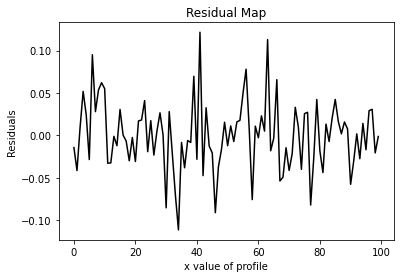

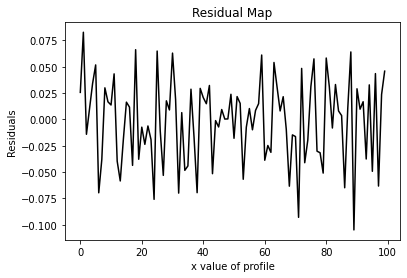

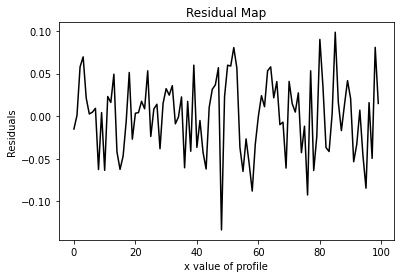

<Figure size 432x288 with 0 Axes>

In [7]:
samples_gen = agg.values("samples")
data_gen = agg.values("data")
noise_map_gen = agg.values("noise_map")

for data, noise_map, samples in zip(data_gen, noise_map_gen, samples_gen):

    instance = samples.max_log_likelihood_instance

    xvalues = np.arange(data.shape[0])

    model_data = sum(
        [profile.profile_from_xvalues(xvalues=xvalues) for profile in instance]
    )

    residual_map = data - model_data

    plot_line(
        xvalues=xvalues,
        line=residual_map,
        title="Residual Map",
        ylabel="Residuals",
        color="k",
    )

There is a problem with how we plotted the residuals above, can you guess what it is?

We used lists! If we had fit a large sample of data, the above object would store the data of all objects simultaneously 
in memory on our hard-disk, likely crashing our laptop! To avoid this, we must write functions that manipulate the 
`Aggregator` generators as generators themselves. Below is an example function that performs the same task as above.

In [8]:


def plot_residuals_from_agg_obj(agg_obj):

    data = agg_obj.data
    noise_map = agg_obj.figure_noise_map
    samples = agg_obj.samples

    instance = samples.max_log_likelihood_instance

    xvalues = np.arange(data.shape[0])

    model_data = sum(
        [profile.profile_from_xvalues(xvalues=xvalues) for profile in instance]
    )

    residual_map = data - model_data

    plot_line(
        xvalues=xvalues,
        line=residual_map,
        title="Residual Map",
        ylabel="Residuals",
        color="k",
    )


To manipulate this function as a generator using the `Aggregator`, we apply it to the `Aggregator`'s `map` function.

In [9]:
plot_residuals_gen = agg.map(func=plot_residuals_from_agg_obj)

Lets get the `max_log_likelihood_instance`s, as we did in tutorial 3.

In [10]:
instances = [samps.max_log_likelihood_instance for samps in agg.values("samples")]

Okay, we want to inspect the fit of each `max_log_likelihood_instance`. To do this, we reperform each fit.

First, we need to create the `model_data` of every `max_log_likelihood_instance`. Lets begin by creating a list 
of profiles of every model-fit.